In [43]:
import pandas as pd
import numpy as np
import argparse
import random
import time
import os
import duckdb
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from crptmidfreq.utils.common import to_csv

from crptmidfreq.config_loc import get_data_db_folder
from crptmidfreq.config_loc import get_analysis_folder

from crptmidfreq.res.visualize_pairs.data_cleaning import get_univ_cnt
from crptmidfreq.featurelib.lib_v1 import *
from crptmidfreq.strats import *
from crptmidfreq.stepper.zregistry import StepperRegistry

from pyts.image import MarkovTransitionField
from pyts.image import GramianAngularField

import matplotlib
import matplotlib.pyplot as plt

g_r = StepperRegistry()
g_folder = 'res_kmeans_v1'

In [44]:
featd=prepare_klines(start_date='2025-03-01',
                   end_date='2026-01-01',
                   tokens=['BTCUSDT', 'ETHUSDT'],
                   folder=g_folder,
                   name=None,
                   r=g_r,  # stepper registry
                   cfg={}
                   )

2025-04-08 06:54:54 - Missing key=use_lazy_dict in cfg for kmeans_sret -- will use default value
2025-04-08 06:54:54 - Missing key=window_volume_wgt in cfg for kmeans_sret -- will use default value
2025-04-08 06:54:54 - prepare_klines start_date=2025-03-01 end_date=2026-01-01
2025-04-08 06:54:54 - Reading data from DuckDB
2025-04-08 06:54:58 - Stepper creating instance res_kmeans_v1 None_cnt_exists
2025-04-08 06:54:59 - Stepper creating instance res_kmeans_v1 None_close_diff1
2025-04-08 06:54:59 - Stepper creating instance res_kmeans_v1 None_tret_clip
2025-04-08 06:55:00 - Stepper creating instance res_kmeans_v1 None_turnover_ewm43200
2025-04-08 06:55:00 - Stepper creating instance res_kmeans_v1 None_turnover_ewm43200_qtl


In [45]:
featd,nfeats=perform_ewm(featd,['tret'],[60],folder=g_folder,r=g_r)
ewmcol=nfeats[0]

2025-04-08 06:55:01 - Stepper creating instance res_kmeans_v1 None_tret_ewm60


In [46]:
df=pd.DataFrame({k:featd[k] for k in featd.keys()})

In [47]:
pdf=df.pivot_table(index='dtsi',columns='dscode_str',values=ewmcol)#tret

In [48]:
df.iloc[-1]

sigf_dscode                                           1
dscode                                                1
volume                                      1834.754028
tret_qtlhigh                                   0.001932
wgt                                      9982847.262627
dscode_str                                      ETHUSDT
tret_qtllow                                    -0.00194
sigf_dayofweek                                        1
ipocnt                                              0.5
tret                                           0.001878
taker_buy_volume                            1557.515991
tret_ewm60                                    -0.000065
tret_clipqtl                                   0.001878
sigf_timeofday                                      2.0
turnover                                 3527516.415513
one                                                 1.0
sigf_wgt                                       0.490509
close_time                   2025-03-11 23:59:59

In [49]:


transformer = MarkovTransitionField(image_size=1000,n_bins=3)
X_new = transformer.transform(pdf.fillna(0.0).T)
X_new.shape

(2, 1000, 1000)

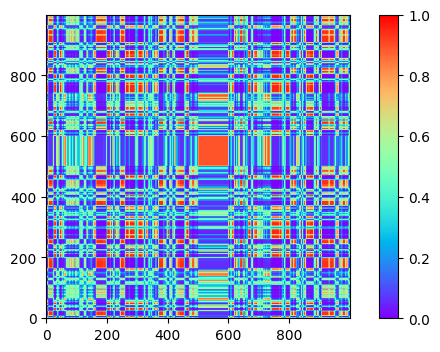

In [50]:

width = 6
height = 5

fig = plt.figure(figsize=(width, height))

width_ratios = (2, 7, 0.4)
height_ratios = (2, 7)
gs = fig.add_gridspec(2, 3,  width_ratios=width_ratios,
                      height_ratios=height_ratios,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax_mtf = fig.add_subplot(gs[1, 1])
im=ax_mtf.imshow(X_new[0], cmap='rainbow', origin='lower', vmin=0., vmax=1.)

# Add colorbar
ax_cbar = fig.add_subplot(gs[1, 2])
fig.colorbar(im, cax=ax_cbar)


In [54]:
from pyts.transformation import BagOfPatterns
from pyts.bag_of_words import BagOfWords


In [57]:
window_size, word_size = 30, 5
bow = BagOfWords(window_size=window_size, word_size=word_size,
                 window_step=window_size, numerosity_reduction=False)
X_bow = bow.transform(pdf.fillna(0.0).iloc[:,[0]].T)

In [52]:
m = BagOfPatterns(window_size=32, word_size=4, n_bins=4,
                     strategy='normal', numerosity_reduction=False)

In [ ]:
m.fit(X)

In [58]:
from pyts.datasets import load_gunpoint

In [ ]:
# Training samples	50
# Test samples	150
#Timestamps	150
# Classes	2
X, _, _, _ = load_gunpoint(return_X_y=True)
# pd.DataFrame(X).shape = (50, 150)

(50, 150)

: 